In [1]:
# Load C4 and C4 error:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
%pylab inline
n=36;m=10;a=1.05
J=169
import numpy as np
import csv

corr_factor = 1198006/1e7
data_root='../../BOSS_DR12_Data/v4/'#'../../BOSS DR12 Data/'
file_root_jack=data_root+'CovMatricesJack/'#'../GoslingSphere/Jack/'#CovMatricesJack/'#_good/'
file_root_all=data_root+'CovMatricesAll/'#_good/'../GoslingSphere/All/'
rr_true_file =data_root+'weight_files/binned_pair_counts_n%d_m%d_j%d.dat'%(n,m,J)
weights_file = data_root+'weight_files/jackknife_weights_n%d_m%d_j%d.dat'%(n,m,J)
counts_file = data_root+'CovMatricesAll/total_counts_n%d_m%d.txt'%(n,m)

weights=np.loadtxt(weights_file)[:,1:]
total_counts = np.loadtxt(counts_file)

Populating the interactive namespace from numpy and matplotlib


/home/oliver/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [24]:
def read_RR_all(n,m,file_root,string='full'):
    rrfile=file_root+'RR_n%d_m%d_%s.txt' %(n,m,string)
    rr_est = np.loadtxt(rrfile)*corr_factor**2.
    rr_true = np.loadtxt(rr_true_file)
    return rr_est, rr_true

def read_cj_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2j_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3j_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4j_n%d_m%d_%s.txt' %(n,m,string)
    cxfile=file_root+'cxj_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4errj_n%d_m%d_%s.txt' %(n,m,string)
    errc3file=file_root+'c3errj_n%d_m%d_%s.txt' %(n,m,string)
    errcxfile=file_root+'cxerrj_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))*corr_factor**2.
    c3=np.loadtxt(c3file)*corr_factor**3.
    c4=np.loadtxt(c4file)*corr_factor**4.
    cx=np.loadtxt(cxfile)*corr_factor**4.
    errc4=np.loadtxt(errc4file)*corr_factor**8.
    errc3=np.loadtxt(errc3file)*corr_factor**6.
    c_tot=c4+a**2.*c2+a*c3+cx
    return c2,c3,c4,cx,errc3,errc4,c_tot

def read_c_all(n,m,file_root,a,string='full'):
    c2file=file_root+'c2_n%d_m%d_%s.txt' %(n,m,string)
    c3file=file_root+'c3_n%d_m%d_%s.txt' %(n,m,string)
    c4file=file_root+'c4_n%d_m%d_%s.txt' %(n,m,string)
    errc4file=file_root+'c4err_n%d_m%d_%s.txt' %(n,m,string)
    errc3file=file_root+'c3err_n%d_m%d_%s.txt' %(n,m,string)
    c2=np.diag(np.loadtxt(c2file))*corr_factor**2.
    c3=np.loadtxt(c3file)*corr_factor**3.
    c4=np.loadtxt(c4file)*corr_factor**4.
    errc4=np.loadtxt(errc4file)*corr_factor**8.
    errc3=np.loadtxt(errc3file)*corr_factor**6.
    c_tot=c4+a**2.*c2+a*c3
    return c2,c3,c4,errc3,errc4,c_tot

In [29]:
c2,c3,c4,errc3,errc4,cT=read_c_all(n,m,file_root_all,a)

## N_eff from 2016 paper

In [47]:
N_bins=len(cT)
prec=np.linalg.inv(cT)
samples=[]
for a in range(int(0.7*len(cT)),len(cT)): # use large a bin
    for b in range(int(0.3*len(cT))): # use small b bin
        if prec[a,a]<=0.:
            continue # remove errors
        if prec[b,b]<=0.:
            continue
        samples.append(prec[a,b]/np.sqrt(prec[a,a]*prec[b,b]))
N_eff_av = N_bins+1./np.var(samples)

In [48]:
N_eff_av

55029.23486917696

### New Ross suggestion

In [49]:
N_eff=np.zeros_like(c4)
for a in range(len(c4)):
    for b in range(len(c4[a])):
        top=c4[a,a]*c4[b,b]+c4[a,b]**2.
        var = (c4err[a,b]-c4[a,b]**2.)/(N_quads-1.)
        N_eff[a,b]=top/var

(array([3.5000e+01, 1.4900e+02, 8.1200e+02, 5.3750e+03, 1.6518e+04,
        3.1747e+04, 3.8063e+04, 2.2331e+04, 1.0335e+04, 4.2350e+03]),
 array([-6.50858035, -5.7962854 , -5.08399045, -4.3716955 , -3.65940055,
        -2.9471056 , -2.23481064, -1.52251569, -0.81022074, -0.09792579,
         0.61436916]),
 <a list of 10 Patch objects>)

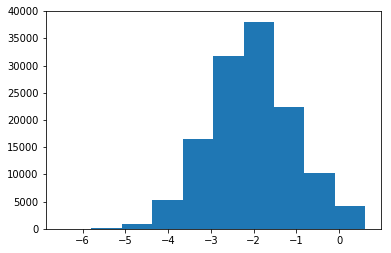

In [50]:
plt.hist(np.log10(N_eff.ravel()))

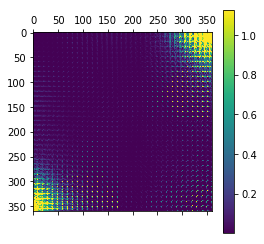

In [51]:
plt.matshow(N_eff,vmax=np.percentile(N_eff.ravel(),98),vmin=np.percentile(N_eff.ravel(),2))
plt.colorbar();